In [8]:
# Import Some Modules
import numpy as np
import scipy.io as sio
import pandas as pd
import seaborn as sns


import matplotlib.pyplot as plt
import matplotlib; matplotlib.style.use('ggplot')

# inline plots
%matplotlib inline

In [21]:
raw_speech = sio.loadmat('speech.mat')
speech_vec = raw_speech['X']
speech_type = raw_speech['y']

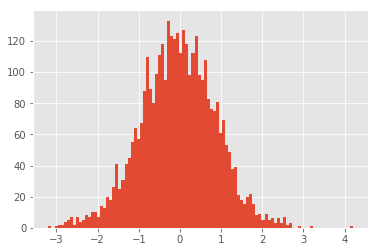

In [38]:
pd.DataFrame(speech_vec)[109].hist(bins = 100)

In [49]:
from scipy.stats import multivariate_normal
from sklearn.metrics import f1_score

def feature_normalize(dataset):
    mu = np.mean(dataset,axis=0)
    sigma = np.std(dataset,axis=0)
    return (dataset - mu)/sigma

def estimateGaussian(dataset):
    mu = np.mean(dataset, axis=0)
    sigma = np.cov(dataset.T)
    return mu, sigma
    
def multivariateGaussian(dataset,mu,sigma):
    p = multivariate_normal(mean=mu, cov=sigma)
    return p.pdf(dataset)

In [95]:
norm_speech_vec = feature_normalize(speech_vec)
mu, sigma = estimateGaussian(norm_speech_vec)

In [102]:
result = multivariateGaussian(norm_speech_vec,mu,sigma)
pd.Series(result).describe()

count     3.686000e+03
mean     1.057444e-179
std       0.000000e+00
min      5.056260e-298
25%      1.825936e-248
50%      3.440977e-233
75%      4.993807e-212
max      3.822815e-176
dtype: float64